In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

In [2]:
path="/content/3635.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Visualisasi dataset dengan Box Plot

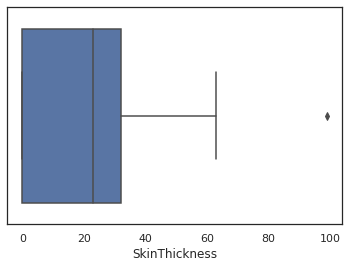

In [6]:
sns.set_theme(style="white")
ax = sns.boxplot(x=df["SkinThickness"])

In [7]:
# Hitung nilai Q1 dan Q3
Q1 = np.quantile(df["SkinThickness"], .25)
Q3 = np.quantile(df["SkinThickness"], .75)

# Hitung nilai IQR
IQR = Q3 - Q1

print('Kuartil 1 = ', Q1)
print('Kuartil 3 = ', Q3)
print('IQR = ', IQR)

min_IQR = Q1 - 1.5 * IQR
max_IQR = Q3 + 1.5 * IQR

print('IQR minimum = ', min_IQR)
print('IQR maksimum = ', max_IQR)

nilai_min = np.min(df["SkinThickness"])
nilai_max = np.max(df["SkinThickness"])

print('Nilai minimum data = ', nilai_min)
print('Nilai maksimum data = ', nilai_max)

if (nilai_min < min_IQR):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')  

if (nilai_max > max_IQR):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')

Kuartil 1 =  0.0
Kuartil 3 =  32.0
IQR =  32.0
IQR minimum =  -48.0
IQR maksimum =  80.0
Nilai minimum data =  0
Nilai maksimum data =  99
Tidak ditemukan low outlier!
Ditemukan high outlier!


In [8]:
low_out = []
high_out = []

for i in df["SkinThickness"]:
    if (i < min_IQR):
        low_out.append(i)
    if (i > max_IQR):
        high_out.append(i)

print('Low outlier : ', low_out)
print('High outlier : ', high_out)

Low outlier :  []
High outlier :  [99]


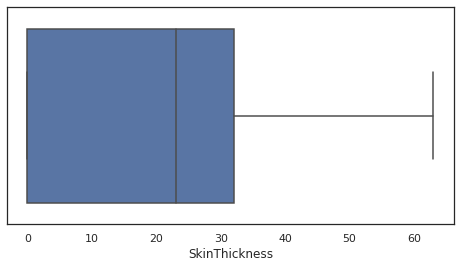

In [9]:
df_handling = df[(df['SkinThickness'] > min_IQR) & (df['SkinThickness'] < max_IQR)]

plt.figure(figsize=(8,4))
sns.boxplot(x='SkinThickness', data=df_handling)

Setelah data outlier / pencilan dibuang, dataset menjadi lebih baik karena sudah tidak terdapat nilai yang terlampau jauh dari rata-rata data.